In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio

import sys
sys.path.append('../../tools/')
import fitting_functions

In [2]:
traces = ['090711e_0006', '090811c_0002', '090811d_0002', '090811d_0004','091111a_0001',
          '091111a_0003','091111c_0003','091211a_0002','091211a_0005']

## Determine number of components needed

We plot the percent change in MSE and look for the elbow beyond which error is not decreased by adding components.

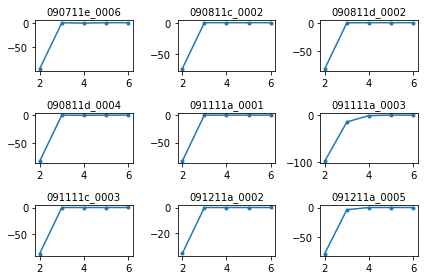

In [5]:
delta_mses = np.zeros((len(traces), 5))

for i in range(len(traces)):
    fit_file = sio.loadmat('extrap/results/'+traces[i]+'.mat')
    lls = fit_file['lls']
    sse = fit_file['sses']
    sse_min = np.min(sse, axis=1)
    delta_mse = (sse_min[1:] - sse_min[:-1])/sse_min[:-1]
    delta_mses[i,:] = delta_mse
    
    plt.subplot(3,3,i+1)
    plt.plot(np.arange(5)+2, delta_mse*100, '.-')
    plt.title(traces[i], fontsize=10)
plt.tight_layout()

For all fixations except 091111a_0003, there was little to no improvement beyond 2 components. For 091111a_0003, there was negligible improvement beyond 3 components.

# Evaluate extrapolation quality

In [13]:
factor_file = sio.loadmat('../long-fixations/relative_errors.mat')
delta_time = factor_file['t'][0][0]
delta = factor_file['delta'][0][0]

In [14]:
best_num_components = {'090711e_0006':2, '090811c_0002':2, '090811d_0002':2, '090811d_0004':2,'091111a_0001':2,
                        '091111a_0003':3,'091111c_0003':2,'091211a_0002':2,'091211a_0005':2}

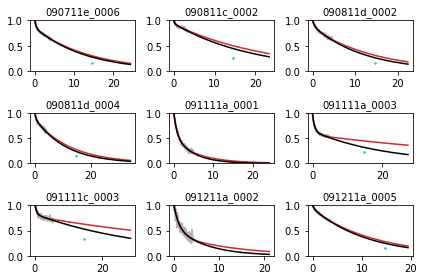

In [18]:
for i in range(len(traces)):
    trange, eye_pos, pe_start_index, displacement_index, release_index, step_pos = fitting_functions.importActiveData('../../data/active/fixed/'+traces[i]+'.mat')
    
    fit_file = sio.loadmat('extrap/results/'+traces[i]+'.mat')
    lls = fit_file['lls']
    fits = fit_file['fits']
    best_fit_ind = np.argmax(lls[best_num_components[traces[i]]-1,:])
    
    conservative_file = sio.loadmat('extrap/results/'+traces[i]+'_conservative.mat')
    conservative_fit = conservative_file['fit'][0]
    
    plt.subplot(3,3,i+1)
    plt.plot(trange[:displacement_index], eye_pos[:displacement_index]/eye_pos[0], c=(0.7,)*3)
    plt.plot(trange, fitting_functions.exponentialModel(trange, fits[best_num_components[traces[i]]-1, 0][best_fit_ind, :]), label='Best', c='C3')
    plt.scatter(delta_time-0.5, fitting_functions.exponentialModel(delta_time-0.5, fits[best_num_components[traces[i]]-1, 0][best_fit_ind, :])*(1+delta),2, color='C9')
    
    plt.plot(trange, fitting_functions.exponentialModel(trange, conservative_fit), c='k', label='Conservative')
    plt.ylim([0, 1])
    plt.title(traces[i], fontsize=10)

plt.tight_layout()